# Distances
This notebook illustrates what has been shown in the slides, in addition to a hierarchical clustering exercise. More concretely, the points addressed in this notebook are:
1) Why is data normalization so important?
2) Comparing time series without and with normalization
3) When euclidean, manhattan or hamming are not a good choice?
4) Hierarchical clustering of energy data (including an exercise)

In [38]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import khiva as kv

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 5]

## Why is data normalization so important?

As explained in the slides, some distance measures are sensible to data normalization. If we want the distance measure to compare the shape we should normalize the data. Let's see the reason in an example:

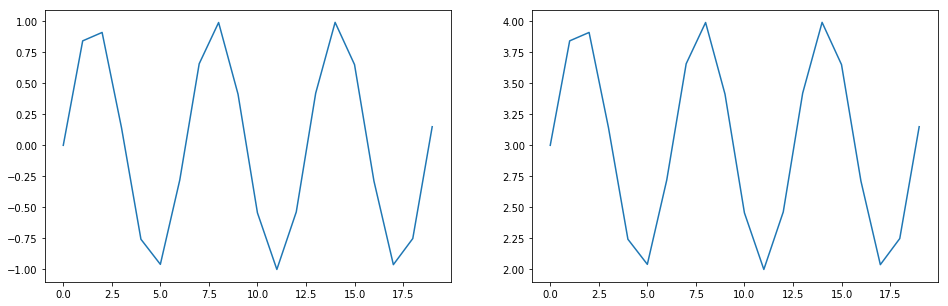

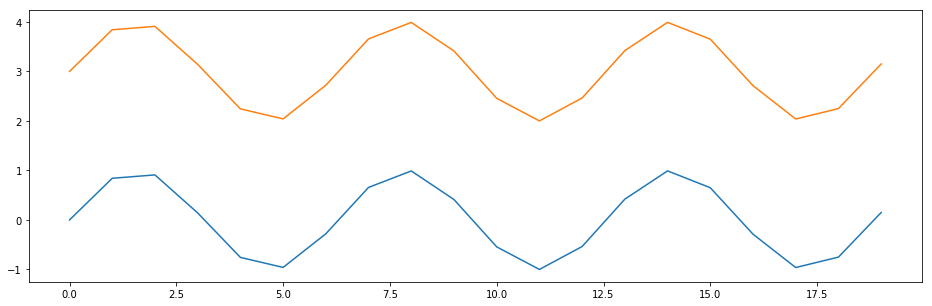

In [39]:
# sinusoidal signal
a = np.sin(np.arange(20))
f, axarr = plt.subplots(1, 2)
axarr[0].plot(a)

# sinusoidal signal with same shape but whose values are in a different range
b = a + 3.0
axarr[1].plot(b)
plt.show()
plt.close()

plt.subplot(111)
plt.plot(a)
plt.plot(b)
plt.show()
plt.close()

## Comparing both sequences
We will now use khiva's distance algorithm implementations to compare both sequences, first without normalizing them and then normalizing them beforehand.

In [40]:
# Khiva expects the sequence arranged in the same array and different columns.
# The following line prepares the data before invoking the distance algorithms
tss = kv.Array([a, b])

# Display the Khiva array information
print("Time series inside a Khiva Array")
print(tss.to_numpy())
print("\n")

# Calling the distance algorithms. Please be aware that the result is a Khiva array, we can later convert
# them to NumPy arrays.
euclidean_distance = kv.distances.euclidean(tss)
manhattan_distance = kv.distances.manhattan(tss)
hamming_distance = kv.distances.hamming(tss)
dtw_distance = kv.distances.dtw(tss)
sbd_distance = kv.distances.sbd(tss)

# The result produced by the distance algorithms of Khiva is a lower-triagonal matrix.
# Let's print one of them
print("Euclidean distance matrix")
print(euclidean_distance.to_numpy())
print("\n")

# Printing the distance value of each algorithm
print("Euclidean: " + str(euclidean_distance.to_numpy()[1,0]))
print("Manhattan: " + str(manhattan_distance.to_numpy()[1,0]))
print("Hamming: " + str(hamming_distance.to_numpy()[1,0]))
print("DTW: " + str(dtw_distance.to_numpy()[1,0]))
print("SBD: " + str(sbd_distance.to_numpy()[1,0]))

Time series inside a Khiva Array
[[ 0.          0.84147096  0.90929741  0.14112    -0.7568025  -0.95892429
  -0.27941549  0.65698659  0.98935825  0.41211849 -0.54402113 -0.99999022
  -0.53657293  0.42016703  0.99060738  0.65028787 -0.28790331 -0.96139747
  -0.75098723  0.14987721]
 [ 3.          3.84147096  3.90929747  3.14111996  2.24319744  2.04107571
   2.72058439  3.65698671  3.98935819  3.41211843  2.45597887  2.00000978
   2.46342707  3.42016697  3.99060726  3.65028787  2.71209669  2.03860259
   2.24901271  3.14987731]]


Euclidean distance matrix
[[ 0.          0.        ]
 [13.41640759  0.        ]]


Euclidean: 13.416407585144043
Manhattan: 60.0
Hamming: 20.0
DTW: 60.0
SBD: 0.0


## Evaluating the results
As it can be observed, all the algorithms except `sbd` return a distance value different to `0.0`. The reason is that any of them normalizes the input data. However, `sbd` does, and that is why it is the only one saying the time series are identical in shape.

## Repeating the comparison normalizing the input data

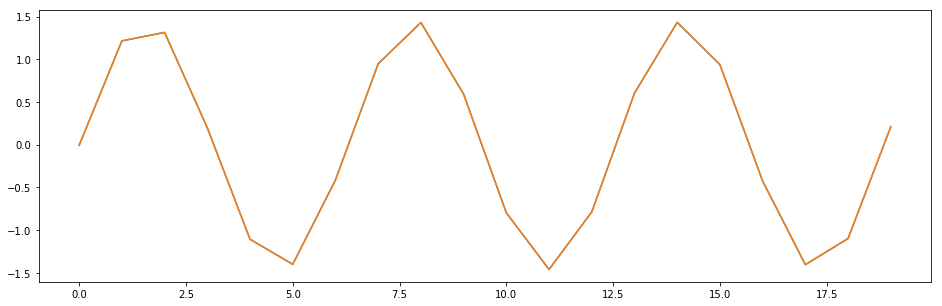

In [41]:
# Using Khiva's z-Normalization algorithm
tss_norm = kv.normalization.znorm(tss)

# Plotting the normalized data
tss_norm_np = tss_norm.to_numpy()
plt.plot(tss_norm_np[0,:])
plt.plot(tss_norm_np[1,:])
plt.show()
plt.close()

In [42]:
# What would you expect now if we compute the different distances again.
euclidean_distance_norm = kv.distances.euclidean(tss_norm)
manhattan_distance_norm = kv.distances.manhattan(tss_norm)
hamming_distance_norm = kv.distances.hamming(tss_norm)
dtw_distance_norm = kv.distances.dtw(tss_norm)
sbd_distance_norm = kv.distances.sbd(tss_norm)

# Printing the distance value of each algorithm
print("Euclidean (norm): " + str(euclidean_distance_norm.to_numpy()[1,0]))
print("Manhattan (norm): " + str(manhattan_distance_norm.to_numpy()[1,0]))
print("Hamming (norm): " + str(hamming_distance_norm.to_numpy()[1,0]))
print("DTW (norm): " + str(dtw_distance_norm.to_numpy()[1,0]))
print("SBD (norm): " + str(sbd_distance_norm.to_numpy()[1,0]))

Euclidean (norm): 6.31512421023217e-07
Manhattan (norm): 2.4274922907352448e-06
Hamming (norm): 17.0
DTW (norm): 2.4274922907352448e-06
SBD (norm): 0.0


## Evaluating the results
As it can be observed, now all the algorithms except `hamming` return a distance value close to `0.0`. The reason is that the normalized data is _almost_ exact in shape and magnitude. Yes, _almost_ because they vary at a given decimal and that is the reason why `hamming`, which compares the distinct values and sums them, produces a value of 17.0.

## When euclidean, manhattan or hamming are not a good choice?
In this example, we are going to illustrate a different reason why we should consider different distance measures.

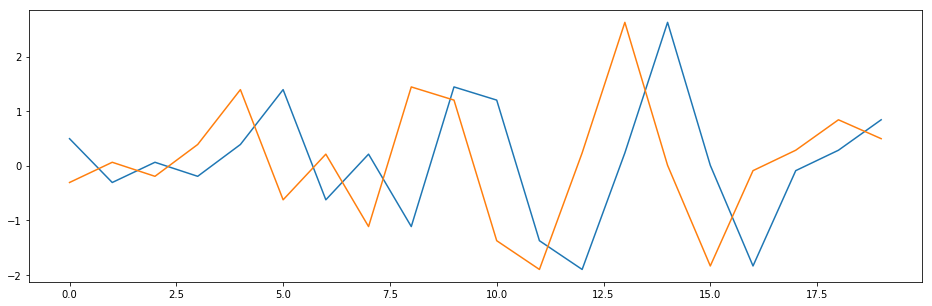

In [43]:
# Generate random data
series1 = np.random.randn(20)

# Shift it 1 position to the left
series2 = np.roll(series1, -1)

# Plotting the series
plt.plot(series1)
plt.plot(series2)
plt.show()
plt.close()

In [44]:
tss = kv.Array([series1, series2])

# Calling the distance algorithms.
euclidean_distance = kv.distances.euclidean(tss)
manhattan_distance = kv.distances.manhattan(tss)
hamming_distance = kv.distances.hamming(tss)
dtw_distance = kv.distances.dtw(tss)
sbd_distance = kv.distances.sbd(tss)

# Printing the distance value of each algorithm
print("Euclidean: " + str(euclidean_distance.to_numpy()[1,0]))
print("Manhattan: " + str(manhattan_distance.to_numpy()[1,0]))
print("Hamming: " + str(hamming_distance.to_numpy()[1,0]))
print("DTW: " + str(dtw_distance.to_numpy()[1,0]))
print("SBD: " + str(sbd_distance.to_numpy()[1,0]))

Euclidean: 6.813561916351318
Manhattan: 25.121564865112305
Hamming: 20.0
DTW: 1.1492093801498413
SBD: 0.006889998912811279


## Hierarchical clustering of energy data

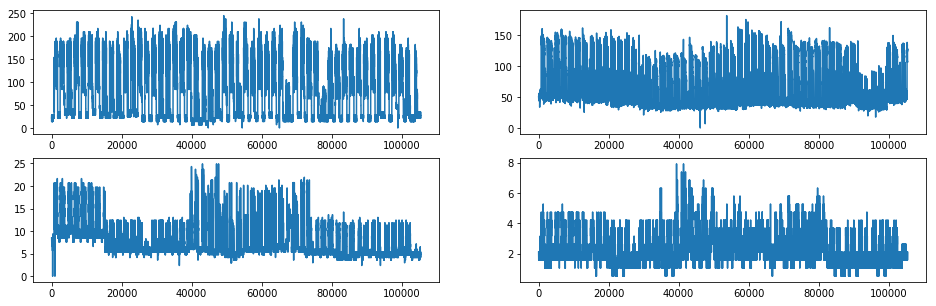

In [45]:
from scipy.cluster import hierarchy

# Data from the [EnerNOC Open Data dataset](https://open-enernoc-data.s3.amazonaws.com/anon/index.html)
# Commercial (8.csv and 29.csv)
# Education (88.csv and 92.csv)
commercial1 = pd.read_csv('data/8.csv')['value'].values
commercial2 = pd.read_csv('data/29.csv')['value'].values
education1 = pd.read_csv('data/88.csv')['value'].values[:-1]
education2 = pd.read_csv('data/92.csv')['value'].values[:-1]

f, axarr = plt.subplots(2,2)

axarr[0, 0].plot(commercial1)
axarr[0, 1].plot(commercial2)
axarr[1, 0].plot(education1)
axarr[1, 1].plot(education2)

plt.show()
plt.close()

Euclidean distance: [[    0.             0.             0.             0.        ]
 [19222.64453125     0.             0.             0.        ]
 [33753.5625     24074.61914062     0.             0.        ]
 [35357.33203125 25861.97070312  2043.47766113     0.        ]]


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 3153.1735234341077, 3153.1735234341077, 0.0],
  [0.0, 19222.64453125, 19222.64453125, 0.0],
  [3153.1735234341077,
   43853.828315996565,
   43853.828315996565,
   19222.64453125]],
 'ivl': ['Education 88.csv',
  'Education 92.csv',
  'Commercial 8.csv',
  'Commercial 29.csv'],
 'leaves': [2, 3, 0, 1],
 'color_list': ['g', 'r', 'b']}

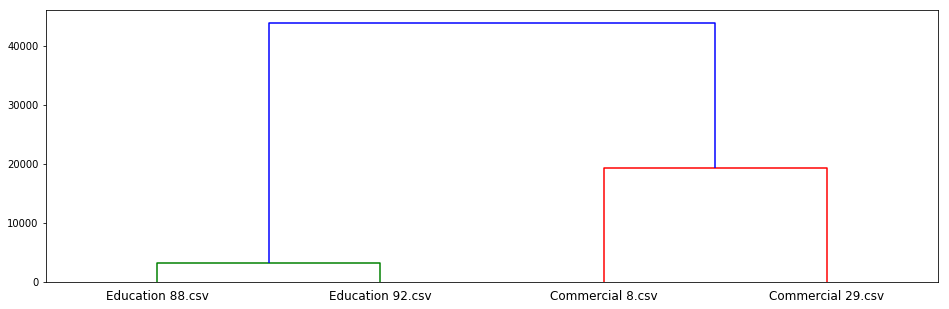

In [46]:
# Mix them up
energy_series = kv.Array(np.vstack([commercial1, commercial2, education1, education2]))

def lbl_fun(id):
    if id == 0:
        return "Commercial 8.csv"
    elif id == 1:
        return "Commercial 29.csv"
    elif id == 2:
        return "Education 88.csv"
    else: #is 3
        return "Education 92.csv"

euclidean_distance = kv.distances.euclidean(energy_series)

euclidean_distance_np = euclidean_distance.to_numpy()
print("Euclidean distance: " + str(euclidean_distance_np))

Z = hierarchy.linkage(euclidean_distance_np, 'complete')
hierarchy.dendrogram(Z, leaf_label_func=lbl_fun)

# Exercise: Plot the dendogram using a different distance measure and interpret it
# Use plt.figure() if you want to conserve the previous dendogram